<a href="https://colab.research.google.com/github/Shivaram-9/VRSU-SHIVARAM/blob/main/SHIVARAM_VRSU_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#POINT PROCESSING


#(a.) Histogram Equalization


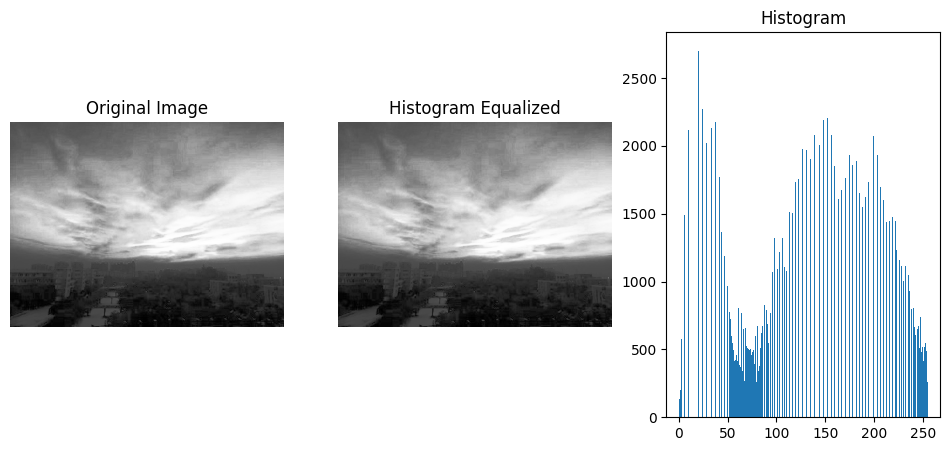

In [1]:
# LAB EXP 1 --   IMAGE ENHANCEMENT
# POINT PROCESSING
# HISTOGRAM EQUALIZATION
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/8_eq.bmp", 0)

he_img=cv2.equalizeHist(img)

plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Histogram Equalized")
plt.imshow(he_img, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Histogram")
plt.hist(img.ravel(), bins=256)
plt.show()


#(b.)CLAHE

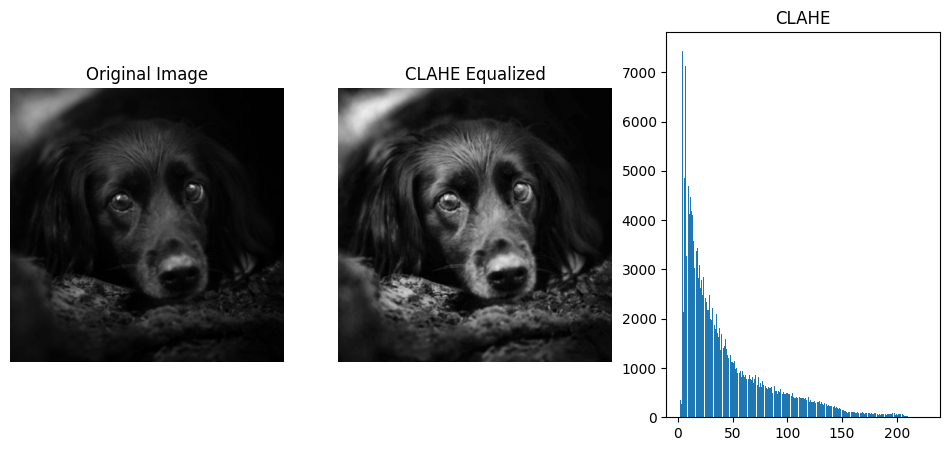

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/clahe-1024x471.png",0)
clahe=cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img=clahe.apply(img)

plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img, cmap="grey")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("CLAHE Equalized")
plt.imshow(clahe_img, cmap="grey")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("CLAHE")
plt.hist(clahe_img.ravel(), bins=256)
plt.show()

#(c.)COLOR ENHANCEMENT

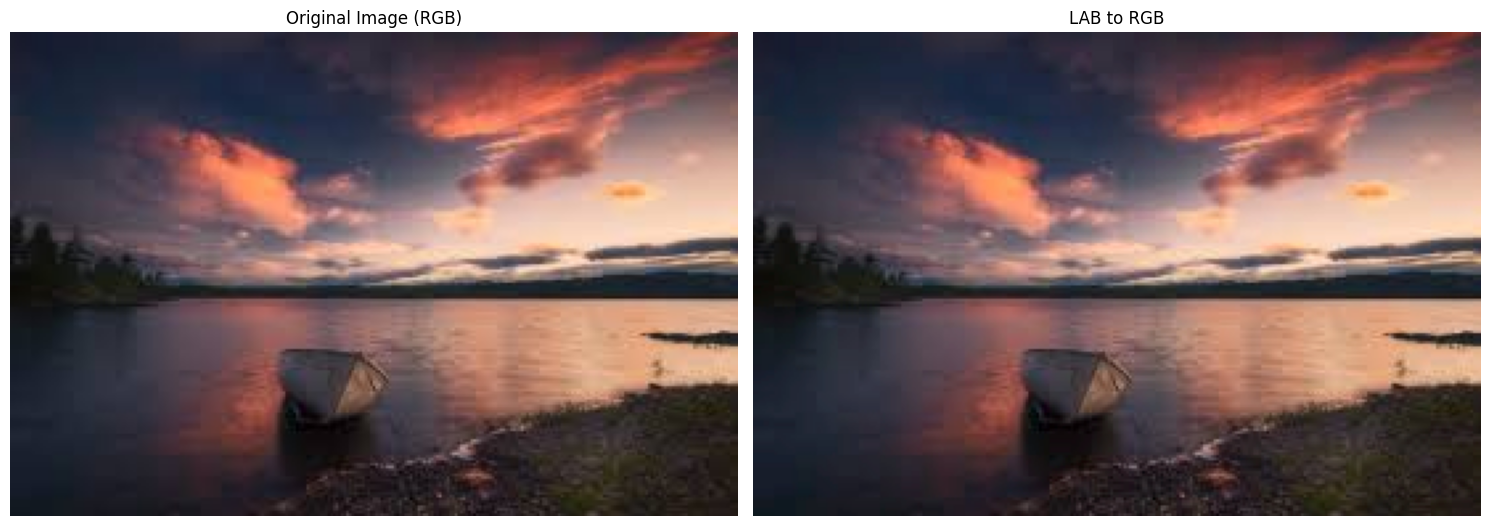

In [4]:
import cv2
import matplotlib.pyplot as plt

# Read the image as a color image (BGR format by default)
img_bgr = cv2.imread("/content/images.jpg")

# Convert BGR to LAB
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

# Split LAB channels
L, A, B = cv2.split(img_lab)

# Convert LAB back to RGB for display (or for further use)
img_rgb_from_lab = cv2.cvtColor(img_lab, cv2.COLOR_LAB2RGB)

# Convert original BGR to RGB for matplotlib display
img_rgb_original = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 10)) # Adjust figure size for more subplots

# Plot original image
plt.subplot(1, 2, 1)
plt.title("Original Image (RGB)")
plt.imshow(img_rgb_original)
plt.axis("off")

# # Plot L channel
# plt.subplot(2, 3, 2)
# plt.title("LAB - L Channel")
# plt.imshow(L, cmap="gray") # L channel is grayscale
# plt.axis("off")

# # Plot A channel
# plt.subplot(2, 3, 3)
# plt.title("LAB - A Channel")
# plt.imshow(A, cmap="RdYlGn") # A channel represents green-red values
# plt.axis("off")

# # Plot B channel
# plt.subplot(2, 3, 4)
# plt.title("LAB - B Channel")
# plt.imshow(B, cmap="YlGnBu") # B channel represents blue-yellow values
# plt.axis("off")

# Plot the image converted from LAB back to RGB
plt.subplot(1, 2, 2)
plt.title("LAB to RGB")
plt.imshow(img_rgb_from_lab)
plt.axis("off")

plt.tight_layout()
plt.show()

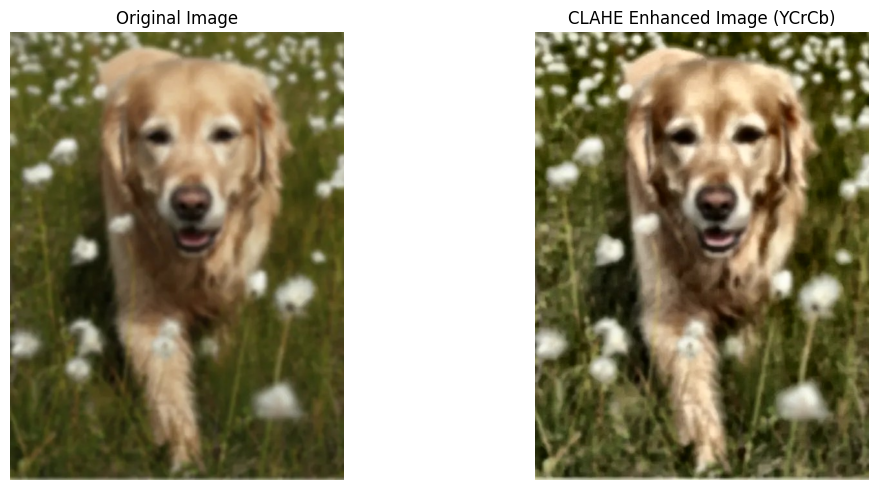

In [5]:
import cv2
import matplotlib.pyplot as plt

# Read the original image in BGR format
img_bgr = cv2.imread("/content/colorcorrection_intro2_25062716490234.jpg")

# Convert BGR to YCrCb
img_ycrcb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YCrCb)

# Split YCrCb channels
Y, Cr, Cb = cv2.split(img_ycrcb)

# Apply CLAHE to Y channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_y = clahe.apply(Y)

# Merge CLAHE-enhanced Y channel with original Cr and Cb channels
merged_ycrcb = cv2.merge([clahe_y, Cr, Cb])

# Convert enhanced YCrCb back to BGR
enhanced_bgr = cv2.cvtColor(merged_ycrcb, cv2.COLOR_YCrCb2BGR)

# Convert original BGR to RGB for matplotlib display
img_rgb_original = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Convert enhanced BGR to RGB for matplotlib display
enhanced_rgb = cv2.cvtColor(enhanced_bgr, cv2.COLOR_BGR2RGB)

# Display original and enhanced images side-by-side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_rgb_original)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("CLAHE Enhanced Image (YCrCb)")
plt.imshow(enhanced_rgb)
plt.axis("off")

plt.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(1079.5), np.float64(715.5), np.float64(-0.5))

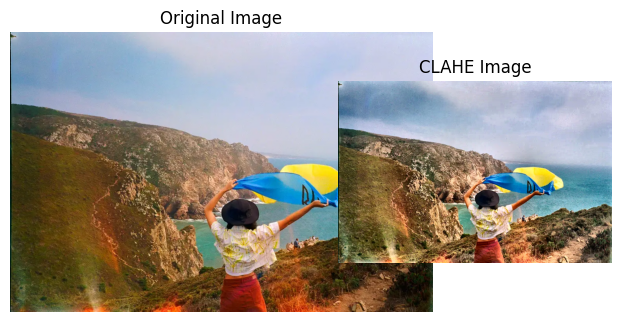

In [6]:
import cv2
import matplotlib.pyplot as plt

img= cv2.imread("/content/enhance-1-result.webp")
img_ycrcb=cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)

y,cr,cb=cv2.split(img_ycrcb)

clahe=cv2.createCLAHE(clipLimit=2.5,tileGridSize=(8,8))
y_clahe=clahe.apply(y)

img_clahe=cv2.merge((y_clahe,cr,cb))

img_clahe=cv2.cvtColor(img_clahe,cv2.COLOR_YCrCb2BGR)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,3,2)
plt.title("CLAHE Image")
plt.imshow(cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB))
plt.axis("off")

# plt.subplot(1,3,3)
# plt.title("Histogram of CLAHE Y-channel")
# plt.hist(y_clahe.ravel(),256)
# plt.show()

# Image Enhancement

#(a.) Image Smoothening

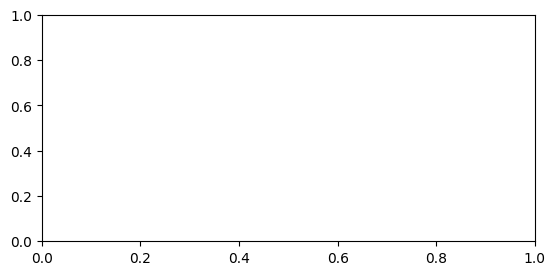

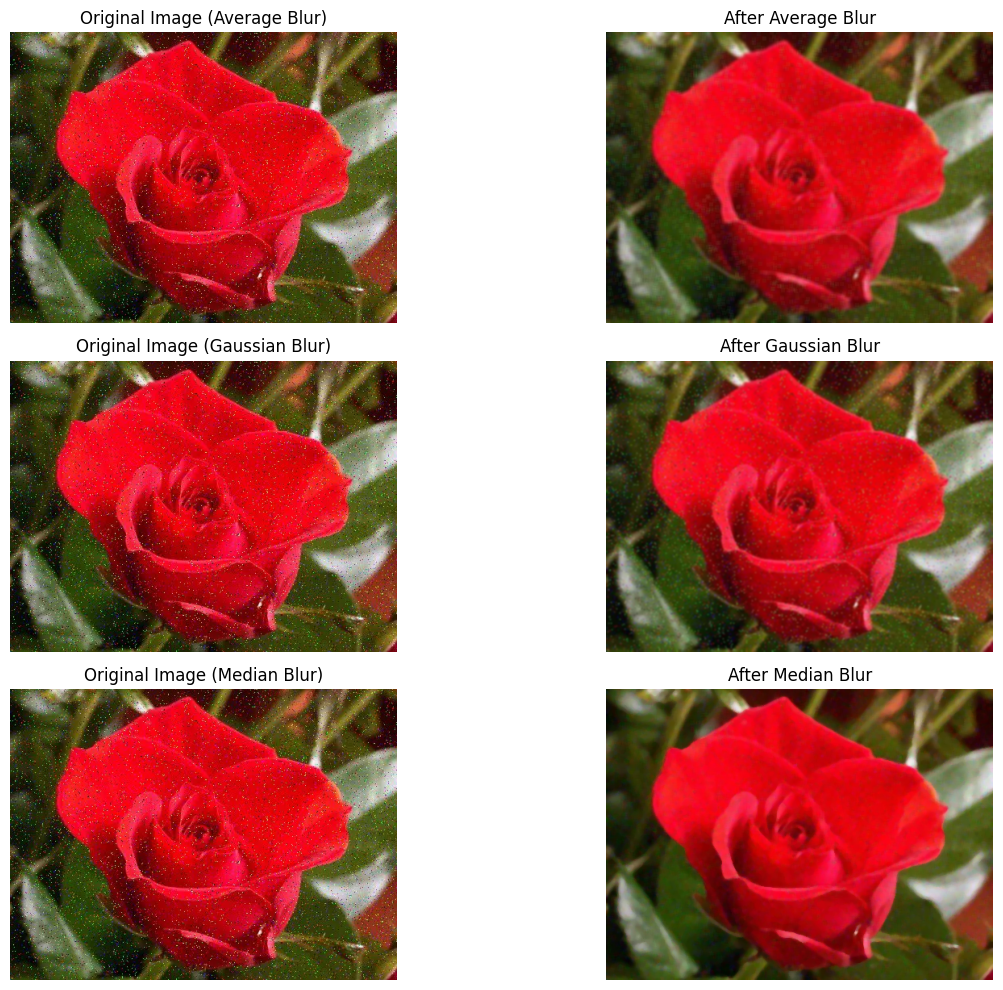

In [1]:
# Spatial Domain Filtering - Smoothing

import cv2
import matplotlib.pyplot as plt


# Load 3 different images

img_avg = cv2.imread("/content/Noise-Image.webp")
img_gauss = cv2.imread("/content/Noise-Image.webp")
img_median = cv2.imread("/content/Noise-Image.webp")

# Check loading
if img_avg is None or img_gauss is None or img_median is None:
  print("Error: One or more images not found. Check file paths!")
  exit()
# Convert BGR > RGB for correct display
img_avg_rgb = cv2.cvtColor(img_avg, cv2.COLOR_BGR2RGB)
img_gauss_rgb = cv2.cvtColor(img_gauss, cv2.COLOR_BGR2RGB)
img_median_rgb = cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB)


# Convert BGR > RGB for correct display
img_avg_rgb = cv2.cvtColor(img_avg, cv2.COLOR_BGR2RGB)
img_gauss_rgb = cv2.cvtColor(img_gauss, cv2.COLOR_BGR2RGB)
img_median_rgb = cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB)
#

# Apply filters
#
# 1. Average Smoothing
avg_blur = cv2.blur(img_avg, (5, 5))
avg_blur_rgb = cv2.cvtColor(avg_blur, cv2.COLOR_BGR2RGB)
# 2. Gaussian Smoothing
gaussian_blur = cv2.GaussianBlur(img_gauss, (5, 5), 0)
gaussian_blur_rgb = cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB)
# 3. Median Smoothing
median_blur = cv2.medianBlur(img_median, 5)
median_blur_rgb = cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB)

# Display Before and After for each filter
#

plt.figure(figsize=(14, 10))
#
plt.subplot(3, 2, 1)

plt.figure(figsize=(14, 10))
#
plt.subplot(3, 2, 1)
plt.imshow(img_avg_rgb)
plt.title("Original Image (Average Blur)")
plt.axis('off')
plt.subplot(3, 2, 2)
plt.imshow(avg_blur_rgb)
plt.title("After Average Blur")
plt.axis('off')
#
plt.subplot(3, 2, 3)
plt.imshow(img_gauss_rgb)
plt.title("Original Image (Gaussian Blur)")
plt.axis('off')
plt.subplot(3, 2, 4)
plt.imshow(gaussian_blur_rgb)
plt.title("After Gaussian Blur")
plt.axis('off')
# ----- Median Blur
plt.subplot(3, 2, 5)
plt.imshow(img_median_rgb)
#

plt.title("Original Image (Gaussian Blur)")
plt.axis('off')
plt.subplot(3, 2, 4)
plt.imshow(gaussian_blur_rgb)
plt.title("After Gaussian Blur")
plt.axis('off')
# Median Blur
plt.subplot(3, 2, 5)
plt.imshow(img_median_rgb)
plt.title("Original Image (Median Blur)")
plt.axis('off')
plt.subplot(3, 2, 6)
plt.imshow(median_blur_rgb)
plt.title("After Median Blur")
plt.axis('off')
plt.tight_layout()
plt. show()

#(b)sharpening

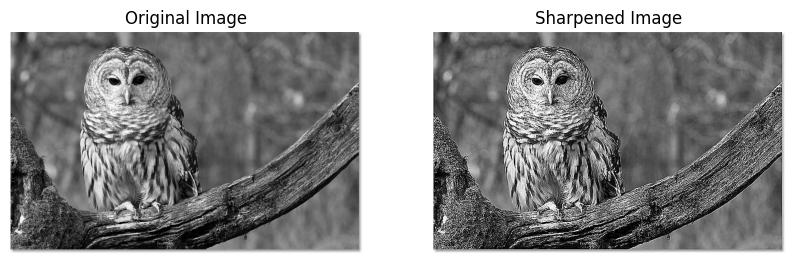

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Load image in grayscale
img = cv2.imread("/content/original.jpg", 0)
# Sharpening kernel (simple 3x3 filter)
kernel = np.array([[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]])

sharpened = cv2.filter2D(img, -1, kernel)
# Show original and sharpened images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray' )
plt.title("Original Image")
plt.axis( 'off')
plt.subplot(1,2,2)
plt.imshow(sharpened, cmap='gray' )
plt.title("Sharpened Image")
plt.axis( 'off')
plt. show()

# Edge Detection

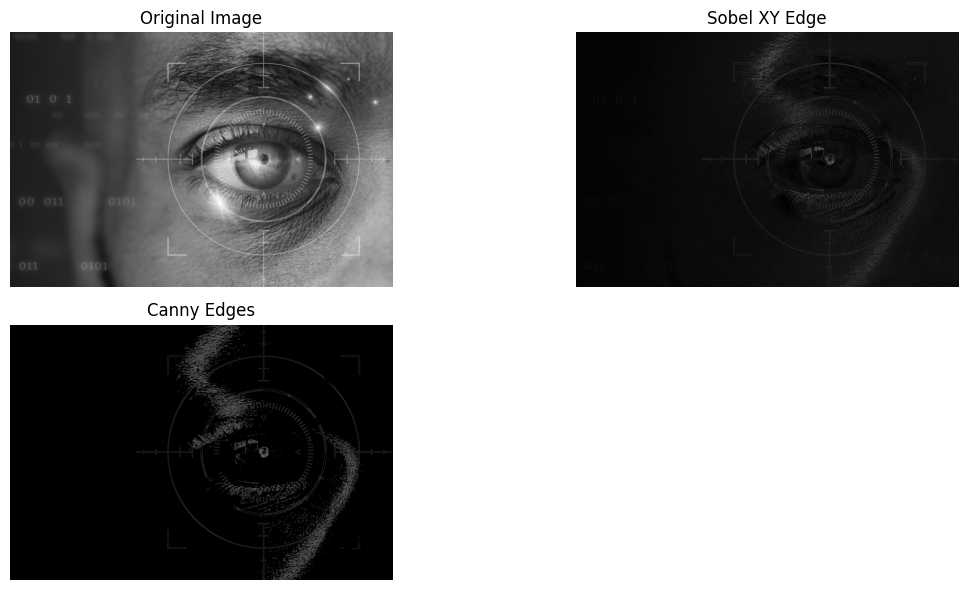

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np # Import numpy for potential use with gradients


img= cv2.imread("/content/6315e433553f41403512b5d2_retinal-biometrics-technology-with-man-s-eye-digital-remix (1).jpg",0)

#1. Sobel edge Detection

sobel_x=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobel_y=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobel_xy=cv2.magnitude(sobel_x,sobel_y)


#2 Canny Edge Detection
canny_edges=cv2.Canny(img,100,200)

#Display Results

plt.figure(figsize=(12,6)) # Adjust figsize for better display of 4 images

plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(img,cmap='gray')
plt.axis("off")


plt.subplot(2,2,2)
plt.title("Sobel XY Edge")
plt.imshow(sobel_xy,cmap='gray') # Display Sobel XY result
plt.axis("off")

plt.subplot(2,2,3)
plt.title("Canny Edges")
plt.imshow(canny_edges,cmap='gray') # Display Canny Edges result
plt.axis("off")

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

# otsu's Binarization

Saving images (1).jpg to images (1) (1).jpg
Optimal Threshold Value: 154.0


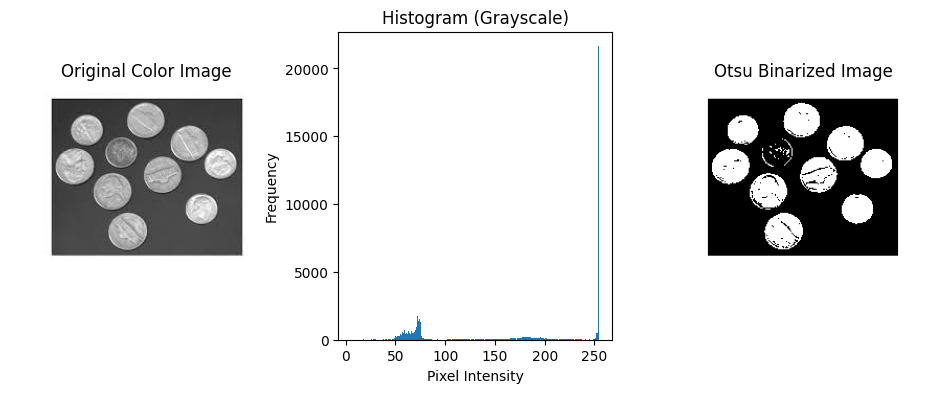

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()

# Get uploaded image path
image_path = list(uploaded.keys())[0]

# Read image (COLOR)
color_img = cv2.imread(image_path)

if color_img is None:
    raise ValueError("Failed to load image!")

# Convert BGR → RGB for display
color_img_rgb = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

# Convert COLOR → GRAYSCALE for Otsu
gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

# Apply Otsu Thresholding
threshold_value, binary_img = cv2.threshold(
    gray_img,
    0,
    255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

print("Optimal Threshold Value:", threshold_value)

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Color Image")
plt.imshow(color_img_rgb)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Histogram (Grayscale)")
plt.hist(gray_img.ravel(), 256)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
plt.title("Otsu Binarized Image")
plt.imshow(binary_img, cmap='gray')
plt.axis("off")

plt.show()

# Feature Extraction


Saving original.jpg to original (1).jpg
Image loaded: original (1).jpg


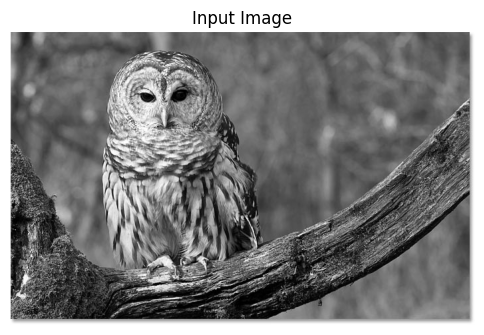

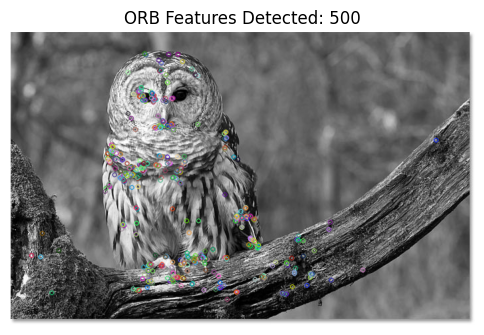

ORB Descriptor Shape: (500, 32)


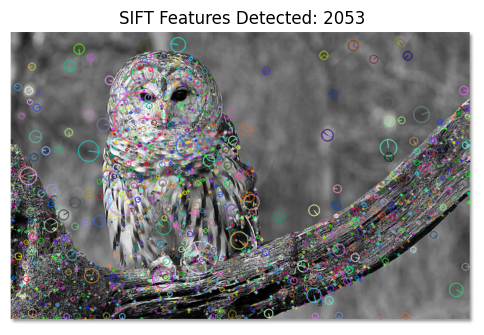

SIFT Descriptor Shape: (2053, 128)
❌ SURF not supported (Patent restriction in OpenCV)
===== FEATURE EXTRACTION SUMMARY =====
ORB Features : 500
SIFT Features : 2053


In [5]:
# Feature Extraction and Feature Detection
# SIFT = Scale-Invariant Feature Transform
# ORB = Oriented FAST and Rotated BRIEF
# SURF = Speeded-Up Robust Features

import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print("Image loaded:", image_path)

# Read image
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display input image
plt.figure(figsize=(6, 6))
plt.imshow(gray, cmap='gray')
plt.title("Input Image")
plt.axis("off")
plt.show()

# ================= ORB =================

# Create ORB detector
orb = cv2.ORB_create(nfeatures=500)

# Detect and compute
kp_orb, des_orb = orb.detectAndCompute(gray, None)

# Draw keypoints
orb_img = cv2.drawKeypoints(
    gray, kp_orb, None,
    flags=cv2.DrawMatchesFlags_DEFAULT
)

# Display ORB result
plt.figure(figsize=(6, 6))
plt.imshow(orb_img, cmap='gray')
plt.title(f"ORB Features Detected: {len(kp_orb)}")
plt.axis("off")
plt.show()

print("ORB Descriptor Shape:", des_orb.shape)

# ================= SIFT =================

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect and compute
kp_sift, des_sift = sift.detectAndCompute(gray, None)

# Draw keypoints
sift_img = cv2.drawKeypoints(
    gray, kp_sift, None,
    flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS
)

# Display SIFT result
plt.figure(figsize=(6, 6))
plt.imshow(sift_img, cmap='gray')
plt.title(f"SIFT Features Detected: {len(kp_sift)}")
plt.axis("off")
plt.show()

print("SIFT Descriptor Shape:", des_sift.shape)

# ================= SURF =================
# SURF is patented and usually unavailable in Colab

try:
    surf = cv2.xfeatures2d.SURF_create(400)
    kp_surf, des_surf = surf.detectAndCompute(gray, None)

    surf_img = cv2.drawKeypoints(
        gray, kp_surf, None,
        flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS
    )

    plt.figure(figsize=(6, 6))
    plt.imshow(surf_img, cmap='gray')
    plt.title(f"SURF Features Detected: {len(kp_surf)}")
    plt.axis("off")
    plt.show()

    print("SURF Descriptor Shape:", des_surf.shape)

except:
    print("❌ SURF not supported (Patent restriction in OpenCV)")

# ================= SUMMARY =================

print("===== FEATURE EXTRACTION SUMMARY =====")
print("ORB Features :", len(kp_orb))
print("SIFT Features :", len(kp_sift))